In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import random
import math
import pickle
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

from modules import *

plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.family'] = 'Arial'

In [2]:
# directory
dir_load = 'data/data_processed'

subj_lists = [
    [ # 4
        'wd40fa5a',
        'wa0d6d27',
        'w9d6fa09',
        'w893ec9a',
        'wcba7b92',
        'wa66b044',
        'w57b5ecc',
        'wd530e0c',
        'w8face51',
        'we7ff5c6',
        'w82abfd2',
        'w9d685ca',
        'we64d90f',
        'w37db4c2',
        'w89c7c15',
        'wba842b6',
        'w4917405',
        'wb409fbb',
        'w0f7b65f',
        'w4444d76',
    ],
    [ # 3
        'wff0e37f',
        'w64a20fb',
        'w930df1c',
        'w1136569',
        'w5f0a4e2',
        'we52e417',
        'w4ee306c',
        'waa3a4a4',
        'w3ba63d6',
        'w1206510',
        'w2ce5641',
        'wfc8657f',
        'w6cba169',
        'w3c4d8b1',
        'waec10f6',
        'wf3bd4f2',
        'w4431e3b',
        'w4fd295b',
        'w651bd37',
        'w7425c1c',
    ],
    [ # 2
        'w23214b0',
        'w0248e99',
        'w066fac5',
        'wa15614e',
        'wd29879c',
        'wb8a41d6',
        'wa19beb3',
        'w399f137',
        'w35c6d9b',
        'w3060e43',
        'w1ba309e',
        'w230f76b',
        'wda0c098',
        'w1b53a57',
        'w6755345',
        'w877f456',
        'wcb73b1a',
        'we3f73ff',
        'w0dc1892',
        'wfe0ffa6',
    ],
]

(20,)
(17,)
(18,)


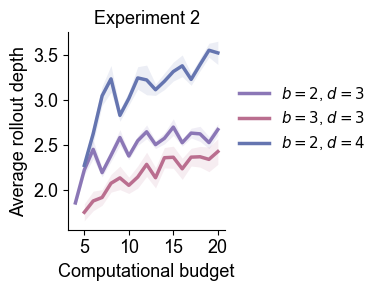

In [3]:
plt.figure(figsize = (4, 3.1))

starts = [4, 5, 5]
accs = [1 / 2, 1 / 3, 1 / 2]
labels = [r'$b = 2$, $d = 3$', r'$b = 3$, $d = 3$', r'$b = 2$, $d = 4$']
colors = ['#8b77b6','#ba6e8f','#6575b0', ]

for idx, subj_list in enumerate(subj_lists):

    num_subj = len(subj_list)
    num_trial = 100


    # load data
    data = []

    # loop through subjects
    for subj_id in subj_list:

        # load data
        data_subj = pickle.load(open(f'{dir_load}/{subj_id}.p', 'rb'))
        data.append(data_subj)


    # preprocess
    dfs = []

    for i in range(num_subj):
        data_subj = data[i]

        # depth-1 rewards
        depth_1_rewards_subj = []
        max_depth_1_rewards_subj = []
        min_depth_1_rewards_subj = []
        max_depth_1_reward_indices_subj = []

        # action values
        action_values_subj = []
        max_action_values_subj = []
        min_action_values_subj = []
        max_action_value_indices_subj = []

        # chosens
        chosen_indices_subj = []
        chosen_action_values_subj = []
        accuracies_subj = []

        # mean rollout length
        mean_rollout_lengths_subj = []

        # loop throught trials
        for k in range(num_trial):
            # depth-1 rewards
            depth_1_nodes = data_subj['child_dicts'][k][data_subj['starts'][k]]
            depth_1_rewards = [data_subj['rewards'][k][_] for _ in depth_1_nodes]
            max_depth_1_reward = np.max(depth_1_rewards)
            min_depth_1_reward = np.min(depth_1_rewards)
            max_depth_1_reward_index = np.argmax(depth_1_rewards)

            # action values
            action_values = data_subj['action_values'][k]
            max_action_value = np.max(action_values)
            min_action_value = np.min(action_values)
            max_action_value_index = np.argmax(action_values)

            # chosens
            chosen_node = data_subj['visit_seqs'][k][1]
            chosen_index = depth_1_nodes.index(chosen_node)
            chosen_action_value = data_subj['action_values'][k][chosen_index]
            accuracy = int(chosen_action_value == max_action_value)

            # rollout length
            mean_rollout_length_trial = 0
            if len(data_subj['rollout_lengths'][k]) > 0:
                mean_rollout_length_trial = np.mean(data_subj['rollout_lengths'][k])
            
            if mean_rollout_length_trial == 0:
                print(data_subj['starts'][k], data_subj['hover_seqs'][k])

            # append
            depth_1_rewards_subj.append(depth_1_rewards)
            max_depth_1_rewards_subj.append(max_depth_1_reward)
            min_depth_1_rewards_subj.append(min_depth_1_reward)
            max_depth_1_reward_indices_subj.append(max_depth_1_reward_index)
            action_values_subj.append(action_values)
            max_action_values_subj.append(max_action_value)
            min_action_values_subj.append(min_action_value)
            max_action_value_indices_subj.append(max_action_value_index)
            chosen_indices_subj.append(chosen_index)
            chosen_action_values_subj.append(chosen_action_value)
            accuracies_subj.append(accuracy)
            mean_rollout_lengths_subj.append(mean_rollout_length_trial)
            

        # df
        df_subj = pd.DataFrame({
            'subj_id': i,
            'hover_counts': data_subj['hover_counts'],
            'rollout_counts': data_subj['rollout_counts'],
            'max_depths': data_subj['max_depths'],
            'hover_limits': data_subj['hover_limits'],
            'depth_1_rewards': depth_1_rewards_subj,
            'max_depth_1_rewards': max_depth_1_rewards_subj,
            'min_depth_1_rewards': min_depth_1_rewards_subj,
            'max_depth_1_reward_indices': max_depth_1_reward_indices_subj,
            'action_values': action_values_subj,
            'max_action_values': max_action_values_subj,
            'min_action_values': min_action_values_subj,
            'max_action_value_indices': max_action_value_indices_subj,
            'chosen_indices': chosen_indices_subj,
            'chosen_action_values': chosen_action_values_subj,
            'accuracies': accuracies_subj,
            'mean_rollout_lengths': mean_rollout_lengths_subj,
        })
        dfs.append(df_subj)

    df = pd.concat(dfs, ignore_index = True)
    df['scores'] = df['accuracies'] * 2 - 1 # add scores

    # filter
    mean_accuracies = df.groupby('subj_id')['accuracies'].mean()
    valid_subj = mean_accuracies[mean_accuracies >= accs[idx]].index
    df = df[df['subj_id'].isin(valid_subj)]
    print(df['subj_id'].unique().shape)

    # plot
    df_filtered = df[(df['mean_rollout_lengths'] != 0) & (df['hover_limits'] >= starts[idx])]
    df_grouped = df_filtered.groupby(['subj_id', 'hover_limits'])['mean_rollout_lengths'].mean().reset_index()
    df_grouped = df_grouped.groupby(['hover_limits'])['mean_rollout_lengths'].agg(['mean', 'sem']).reset_index()

    plt.plot(df_grouped['hover_limits'], df_grouped['mean'], linewidth = 2.5, color = colors[idx], label = labels[idx])
    # plt.axhline(y = 0., color = 'k', linestyle = '--', linewidth = 1)
    plt.fill_between(df_grouped['hover_limits'], df_grouped['mean'] - df_grouped['sem'], df_grouped['mean'] + df_grouped['sem'], color = colors[idx], alpha = 0.12, linewidth = 0)
    # plt.xlim((-1, 21))
    plt.xticks(np.linspace(5, 20, 4))
    # plt.ylim((-0.1, 3.1))
    plt.xlabel('Computational budget')
    plt.ylabel('Average rollout depth')
plt.title('Experiment 2', fontsize = 13)
    
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left', frameon = False, fontsize = 'small')
plt.tight_layout()
# plt.show()ß
plt.savefig('figures/figures_experiment/p_exp2.pdf', bbox_inches = 'tight')